In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from lightgbm import LGBMClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
df1 = pd.read_csv("encoded_emails.csv")

In [3]:
X = df1["Message"]
y = df1["Category"]

In [4]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
def model_evaluations(classifier, y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    # Check if 'predict_proba' method is available for the classifier
    if hasattr(classifier, "predict_proba"):
        # Use predicted probabilities for ROC AUC if available
        roc_auc = roc_auc_score(y_test, classifier.predict_proba(X_test.toarray())[:, 1])
    else:
        
        roc_auc = None
    
    
    # Print the calculated metrics
    print(f" => Evaluations of {model_name} :")
    print("")
    print("Accuracy                :", accuracy)
    print("Precision               :", precision)
    print("Recall                  :", recall)
    print("F1-Score                :", f1)
    print("ROC AUC                 :", roc_auc)
    print("Confusion Matrix")
    print(cm)
    print("")
    print("____________________________________________")
    print("")
    
    

# Calssification Model Evaluations

In [7]:
#Logistic Regression
model = LogisticRegression()
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

model_evaluations(model,y_test,y_pred,"Logistic Regression")
#Support Vector Machine(SVM)
model = SVC()
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

model_evaluations(model,y_test,y_pred,"SVM")
#Naive Bayes
model = GaussianNB()
model.fit(X_train.toarray() , y_train)
y_pred = model.predict(X_test.toarray())

model_evaluations(model,y_test,y_pred,"Naive Bayes")
#Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train.toarray() , y_train)
y_pred = model.predict(X_test.toarray())

model_evaluations(model,y_test,y_pred,"Decision Tree")
#Random Forest 
model = RandomForestClassifier()
model.fit(X_train.toarray() , y_train)
y_pred = model.predict(X_test.toarray())

model_evaluations(model,y_test,y_pred,"Random Forest")
#K-Nearest Neighbour (KNN at k=3)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train.toarray() , y_train)
y_pred = model.predict(X_test.toarray())

model_evaluations(model,y_test,y_pred,"K-Nearest Neighbours (k=3)")


 => Evaluations of Logistic Regression :

Accuracy                : 0.9635167464114832
Precision               : 0.9880239520958084
Recall                  : 0.7366071428571429
F1-Score                : 0.843989769820972
ROC AUC                 : 0.989400404498816
Confusion Matrix
[[1446    2]
 [  59  165]]

____________________________________________

 => Evaluations of SVM :

Accuracy                : 0.9808612440191388
Precision               : 1.0
Recall                  : 0.8571428571428571
F1-Score                : 0.923076923076923
ROC AUC                 : None
Confusion Matrix
[[1448    0]
 [  32  192]]

____________________________________________

 => Evaluations of Naive Bayes :

Accuracy                : 0.9102870813397129
Precision               : 0.6094674556213018
Recall                  : 0.9196428571428571
F1-Score                : 0.7330960854092526
ROC AUC                 : 0.914241318074191
Confusion Matrix
[[1316  132]
 [  18  206]]

_____________________________

# Boosting Model Evaluations

In [8]:
#Ada Boost
weak_learner = DecisionTreeClassifier(max_depth=1)
model = AdaBoostClassifier(base_estimator=weak_learner, n_estimators=50, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test.toarray())

model_evaluations(model,y_test,y_pred,"Ada Boost")


# Create an instance of the LGBMClassifier
model = LGBMClassifier(n_estimators=100, random_state=42, verbosity=-1)  # Set verbosity to -1 to suppress warning
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

model_evaluations(model,y_test,y_pred,"LightGBM")

# XGBoost classifier
model = xgb.XGBClassifier(n_estimators=100, random_state=42 , verbosity=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

model_evaluations(model,y_test,y_pred,"XGBoost")

# CatBoost classifier
model = CatBoostClassifier(iterations=100, random_state=42 , verbose=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

model_evaluations(model,y_test,y_pred,"CatBoost")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


 => Evaluations of Ada Boost :

Accuracy                : 0.979066985645933
Precision               : 0.9655172413793104
Recall                  : 0.875
F1-Score                : 0.9180327868852458
ROC AUC                 : 0.9820642388516179
Confusion Matrix
[[1441    7]
 [  28  196]]

____________________________________________

 => Evaluations of LightGBM :

Accuracy                : 0.9832535885167464
Precision               : 0.9711538461538461
Recall                  : 0.9017857142857143
F1-Score                : 0.9351851851851851
ROC AUC                 : 0.9877139650749804
Confusion Matrix
[[1442    6]
 [  22  202]]

____________________________________________

 => Evaluations of XGBoost :

Accuracy                : 0.9832535885167464
Precision               : 0.9803921568627451
Recall                  : 0.8928571428571429
F1-Score                : 0.9345794392523364
ROC AUC                 : 0.571747669198895
Confusion Matrix
[[1444    4]
 [  24  200]]

____________________

In [10]:
from keras.models import Sequential
from keras.layers import Dense

In [11]:
# Determine the input shape based on the training data
input_shape = X_train.shape[1:]

In [12]:
model = Sequential()

# Multi Layer Perceptron Evaluations

In [13]:
model.add(Dense(10, input_shape=input_shape, activation='relu'))
model.add(Dense(20,  activation='relu'))
model.add(Dense(20,  activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy' , optimizer='adam' , metrics = ['accuracy'])
show = model.fit(X_train.toarray() , y_train , epochs=10 , batch_size = 32)
y_pred = model.predict(X_test)

Epoch 1/10
122/122 [==============================] - 1s 3ms/step - loss: 0.5078 - accuracy: 0.8574
Epoch 2/10
122/122 [==============================] - 0s 3ms/step - loss: 0.1032 - accuracy: 0.9677
Epoch 3/10
122/122 [==============================] - 0s 3ms/step - loss: 0.0230 - accuracy: 0.9938
Epoch 4/10
122/122 [==============================] - 0s 4ms/step - loss: 0.0091 - accuracy: 0.9979
Epoch 5/10
122/122 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 0.9992
Epoch 6/10
122/122 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 7/10
122/122 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 8/10
122/122 [==============================] - 0s 3ms/step - loss: 6.9721e-04 - accuracy: 1.0000
Epoch 9/10
122/122 [==============================] - 0s 3ms/step - loss: 5.0215e-04 - accuracy: 1.0000
Epoch 10/10
53/53 [==============================] - 0s 1ms/step


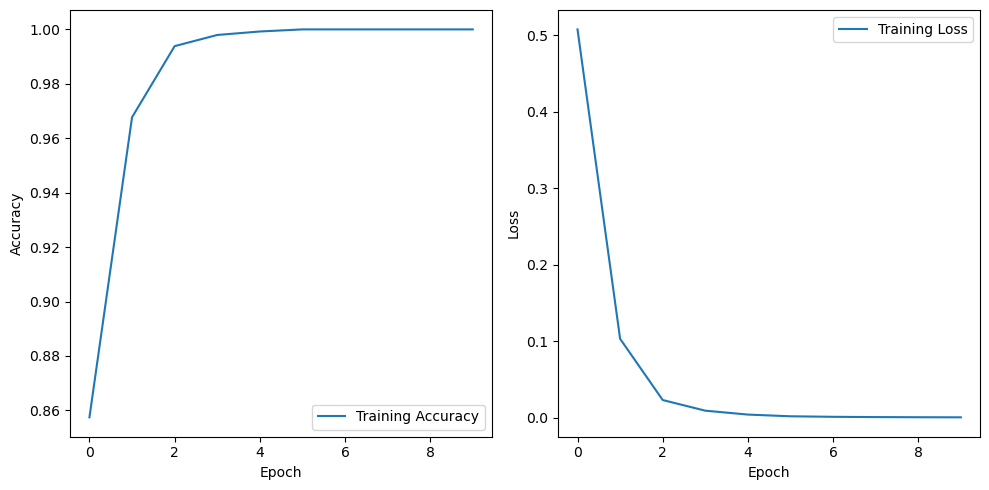

In [14]:
# Plot the accuracy and loss graphs
plt.figure(figsize=(10, 5))

# Accuracy graph
plt.subplot(1, 2, 1)
plt.plot(show.history['accuracy'], label='Training Accuracy')
# plt.plot(show.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss graph
plt.subplot(1, 2, 2)
plt.plot(show.history['loss'], label='Training Loss')
# plt.plot(show.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [19]:
data = pd.read_csv('house_prices_dataset.csv')

# Regression Model Evaluations

In [20]:


# Separate features and target variable
X = data.drop(columns=["SalePrice"])  # Features
y = data["SalePrice"]  # Target variable (sale price)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a regression model (e.g., Linear Regression, Random Forest, etc.)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Calculate regression metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the calculated metrics
print("RMS for Linear Regression                :", rmse)
print("MAE for Linear Regression                :", mae)
print("R2 for Linear Regression                 :", r2)


RMS for Linear Regression                : 46109.875835319915
MAE for Linear Regression                : 37779.32214754268
R2 for Linear Regression                 : 0.015875408603874486
